In [44]:
# bench mark 
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import pandas; print("Pandas", pandas.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import tensorflow as tf; print("Tensorflow", tf.__version__)

Linux-4.4.0-157-generic-x86_64-with-Ubuntu-16.04-xenial
Python 3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]
NumPy 1.17.0
Pandas 0.24.2
SciPy 1.1.0
Scikit-Learn 0.21.3
Tensorflow 1.11.0


In [46]:
import os
import pickle
import random
import time

import matplotlib.pyplot as plt
import pandas as pd
from imutils import paths
from kneed import KneeLocator
import pickle
import Accuracy as accuracy
import ImageSearch_Algo_Hash
import ImageSearch_Algo_HSV
import ImageSearch_Algo_ORB
import ImageSearch_Algo_RGB
import ImageSearch_Algo_SIFT
import ImageSearch_Plots as myplots
import Thresholding

# # --------------- Reload modules on :
# %load_ext autoreload
# %autoreload 2


# --------------- TEST PARAMETERS ----------------------#
# TESTNAME = "Data519_RESIZE320"
TESTNAME = "DataUKBENCH10K"
# TESTNAME = "Data519"

# --------------- VAR COMMONS------------------

# IMGDIR = r'./ukbench/'
IMGDIR = r'./imagesbooks/'

# IMGDIR = r'./images/imagesbooks_DENOISE2/'
# IMGDIR = r'./images/imagesbooks_S160/'
# IMGDIR = r'./images/imagesbooks_S320/'
# IMGDIR = r'./images/imagesbooks_CT2.0/'
# IMGDIR = r"V:\\Download\\imagesbooks\\"
# IMGDIRPROCESSED = ['']*5
# IMGDIRPROCESSED[0] = r"V:\\Download\\imagesbooks1\\"
# IMGDIRPROCESSED[1] = r"V:\\Download\\imagesbooks2\\"
# IMGDIRPROCESSED[2] = r"V:\\Download\\imagesbooks3\\"
# IMGDIRPROCESSED[3] = r"V:\\Download\\imagesbooks4\\"
# IMGDIRPROCESSED[4] = r"V:\\Download\\imagesbooks_warp\\"

# --------------- CONFIG PARAMETERS ----------------------#

ORB_FEATURES_LIMIT = 100
ORB_N_CLUSTERS = 500
SIFT_N_CLUSTERS = 500
SIFT_FEATURES_LIMIT = 100
LOWE_RATIO = 0.7
SIFT_PREDICTIONS_COUNT = 100
RGB_PARAMETERCORRELATIONTHRESHOLD = 0.70 # not needed for generation
kneeHSV = 2
kneeRGB = 2
kneeORB = 2
kneeSIFT = 2
HASHLENGTH = 16

# --------------- IMAGES  ----------------------#
imagepaths =  (list(paths.list_images(IMGDIR)))
myDataFiles = pd.DataFrame( {'file' : imagepaths })

In [4]:
# ! pip install imagehash

In [5]:
# ----------- GENERATE ALL FEATURES & SAVE ------------ #

# GEN SIFT
sift_features_limit = SIFT_FEATURES_LIMIT
lowe_ratio = LOWE_RATIO
predictions_count = SIFT_PREDICTIONS_COUNT

mydataSIFT, mytime1 = ImageSearch_Algo_SIFT.gen_sift_features(
    imagepaths, sift_features_limit)
print("SIFT Feature Generation time :", mytime1)
savefile = 'data/' + TESTNAME + '_PandasDF_SIFT_Features_kp'+ str(sift_features_limit)
ImageSearch_Algo_SIFT.SIFT_SAVE_FEATURES (mydataSIFT, savefile)
print("SIFT Feature saved to : ", savefile)
# -- END

# GEN ORB
orb_features_limit = ORB_FEATURES_LIMIT

mydataORB, mytime1 = ImageSearch_Algo_ORB.GEN_ORB_FEATURES(imagepaths, orb_features_limit)
print("ORB Feature Generation time :", mytime1)
savefile = 'data/' + TESTNAME + '_PandasDF_ORB_Features_kp'+ str(orb_features_limit)
ImageSearch_Algo_ORB.ORB_SAVE_FEATURES (mydataORB, savefile)
print("ORB Feature saved to : ", savefile)
# -- END

# GEN RGB
parametercorrelationthreshold = 0.70 # not needed for generation

mydataRGB, mytime = ImageSearch_Algo_RGB.RGB_GEN(imagepaths)
print('RGB Feature Generation time', mytime)
savefile = 'data/' + TESTNAME + '_PandasDF_RGB_Features'
ImageSearch_Algo_RGB.RGB_SAVE_FEATURES (mydataRGB, savefile)
print("RGB Feature saved to : ", savefile)
# -- END

# GEN HSV
mydataHSV, mytime = ImageSearch_Algo_HSV.HSV_GEN(imagepaths)
print('HSV Feature Generation time', mytime)
savefile = 'data/' + TESTNAME + '_PandasDF_HSV_Features'
ImageSearch_Algo_HSV.HSV_SAVE_FEATURES (mydataHSV, savefile)
print("HSV Feature saved to : ", savefile)
# -- END


# GEN HASH
mydataHASH, mytime = ImageSearch_Algo_Hash.HASH_GEN(imagepaths, HASHLENGTH)
print("HASH Features Generation time :", mytime)
savefile = 'data/' + TESTNAME + '_PandasDF_HASH_Features'
ImageSearch_Algo_Hash.HASH_SAVE_FEATURES (mydataHASH, savefile)
# -- END

print ("## Feature Generation Complete.")


KeyboardInterrupt: 

In [33]:

# ----------- GENERATE ALL TREES  ------------ #

# RGB TREE
savefile = 'data/' + TESTNAME + '_RGB_Tree'
myRGBtree = ImageSearch_Algo_RGB.RGB_Create_Tree(mydataRGB, savefile=savefile)

# HSV TREE
savefile = 'data/' + TESTNAME + '_HSV_Tree'
myHSVtree = ImageSearch_Algo_HSV.HSV_Create_Tree(mydataHSV, savefile=savefile)

# HASH TREE
AlgoGenList = ['whash', 'phash', 'dhash', 'ahash']
for algo in AlgoGenList :
    savefile = 'data/' + TESTNAME + '_HASH_Tree_' + str(algo)
    myHASHTree = ImageSearch_Algo_Hash.HASH_Create_Tree(mydataHASH, savefile=savefile, hashAlgo=algo)

# HASH TREE USE HYBRID HASH
HybridAlgoList = ['whash', 'ahash']
savefile = 'data/' + TESTNAME + '_HASH_Hybrid_Tree_' + str(('_').join (HybridAlgoList))
myHybridtree = ImageSearch_Algo_Hash.HASH_CREATE_HYBRIDTREE(mydataHASH, savefile, HybridAlgoList)


KeyboardInterrupt: 

In [29]:
# SIFT FV Tree and Cluster
n_clusters = SIFT_N_CLUSTERS
savefile = 'data/' + TESTNAME + '_SIFT_Tree_Cluster' + str(n_clusters)
mySIFTtree, mySIFTmodel, mySIFTFVHist = ImageSearch_Algo_SIFT.SIFT_CREATE_TREE_MODEL(mydataSIFT[:85], savefile, 100)

Generating SIFT Clusters BOvW and SIFTtree


TypeError: 'NoneType' object is not iterable

In [55]:
mydataSIFT[:100]['siftdes']

0     [[69.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 190...
1     [[0.0, 0.0, 0.0, 15.0, 35.0, 0.0, 0.0, 0.0, 37...
2     [[13.0, 24.0, 101.0, 20.0, 2.0, 2.0, 11.0, 46....
3     [[3.0, 82.0, 144.0, 18.0, 3.0, 0.0, 0.0, 0.0, ...
4     [[33.0, 2.0, 1.0, 4.0, 83.0, 8.0, 0.0, 0.0, 17...
5     [[25.0, 46.0, 40.0, 10.0, 4.0, 3.0, 5.0, 29.0,...
6     [[52.0, 4.0, 5.0, 46.0, 30.0, 2.0, 2.0, 92.0, ...
7     [[24.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 123.0, ...
8     [[107.0, 15.0, 2.0, 6.0, 9.0, 7.0, 2.0, 23.0, ...
9     [[17.0, 32.0, 158.0, 20.0, 0.0, 0.0, 0.0, 0.0,...
10    [[41.0, 14.0, 7.0, 30.0, 7.0, 1.0, 3.0, 58.0, ...
11    [[63.0, 40.0, 1.0, 0.0, 1.0, 6.0, 2.0, 2.0, 46...
12    [[1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 110.0, 81.0, 0...
13    [[16.0, 0.0, 2.0, 11.0, 12.0, 2.0, 1.0, 23.0, ...
14    [[35.0, 1.0, 1.0, 4.0, 19.0, 35.0, 6.0, 4.0, 1...
15    [[30.0, 83.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11...
16    [[20.0, 26.0, 30.0, 107.0, 38.0, 29.0, 12.0, 2...
17    [[2.0, 7.0, 2.0, 8.0, 77.0, 41.0, 0.0, 0.0

In [56]:
len (mydataSIFT.index)

10200

In [68]:
mydataSIFT.loc[877]

file                              ./ukbench/ukbench00925.jpg
siftdes    [[1.0, 4.0, 4.0, 3.0, 1.0, 1.0, 100.0, 37.0, 9...
Name: 877, dtype: object

In [67]:
d = mydataSIFT.loc[877]['siftdes']
print (d)
d.shape

[[  1.   4.   4.   3.   1.   1. 100.  37.   9.   7.   8.   6.   2.   1.
   87. 103.  67.  24.   6.   1.   0.   0.  18. 124.  41.   1.   0.   0.
    2.   2.   2.  33.  66.  27.   5.   3.  19.   5.  56.  41.  19.  47.
   62. 123. 124.  25.  39.  28. 124. 124.  51.  23.   8.   4.   5.  41.
   56.   7.   0.   0.   3.   4.   2.  14. 103.   7.   1.   1.  18.  13.
    5.  76.  20.   6.   4.  21. 124. 124.  94.  43. 124.  53.   7.   5.
   11.  31.  67. 124.  73.  32.   1.   0.   4.   4.   1.  11.  23.   0.
    0.   0.   0.   1.   2.  35.  12.   0.   0.   0.   9.  34.  33.   9.
   26.  20.   4.   2.  15.  26.  42.  38.  64.  20.   1.   0.   3.   0.
    2.  25.]]


(1, 128)

In [53]:
len(mydataSIFT[mydataSIFT['siftdes'].isnull()])

0

In [ ]:
len(mydataSIFT[mydataSIFT['siftdes']==[]])

In [36]:
# ORB FV Tree and Cluster
n_clusters = 500
savefile = 'data/' + TESTNAME + '_ORB_Tree_Cluster' + str(n_clusters)
myORBtree, myORBmodel, myORBFVHist = ImageSearch_Algo_ORB.ORB_CREATE_TREE_MODEL(mydataORB, savefile, n_clusters)

print ("## Tree Generation Complete.")

Generating ORB Clusters BOvW and ORBtree


/home/towshif/venv2/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)
/home/towshif/venv2/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)
/home/towshif/venv2/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)


done clustering. Using clustering model to generate BoW histograms for each image.
ORB Tree generation complete.
Saved (Tree, Model) as  <_io.BufferedWriter name='data/Data519_ORB_Tree_Cluster500.pickle'>
## Tree Generation Complete.


In [47]:
# -----------  LOAD FEATUTES AND TREES from file  ------------ #

HybridAlgoList = ['whash', 'ahash']
AlgoGenList = ['whash', 'phash', 'dhash', 'ahash'] 

# Files 
file_HASH_Feature = 'data/' + TESTNAME + '_PandasDF_HASH_Features'
file_HASH_HybridTree = 'data/' + TESTNAME + '_HASH_Hybrid_Tree_' + str(('_').join (HybridAlgoList))
file_HSV_Cluster = 'data/' + 'test' + '_HSV_Cluster' + str(kneeHSV)
file_HSV_Feature = 'data/' + TESTNAME + '_PandasDF_HSV_Features'
file_HSV_Tree = 'data/' + TESTNAME + '_HSV_Tree'
file_ORB_Cluster = 'data/' + 'test' + '_ORB_Cluster' + str(kneeORB)
file_ORB_Feature = 'data/' + TESTNAME + '_PandasDF_ORB_Features_kp'+ str(ORB_FEATURES_LIMIT)
file_ORB_TreeCluster = 'data/' + TESTNAME + '_ORB_Tree_Cluster' + str(ORB_N_CLUSTERS)
file_Results = 'data/' + TESTNAME + '_Results'
file_RGB_Cluster = 'data/' + 'test' + '_RGB_Cluster' + str(kneeRGB)
file_RGB_Feature = 'data/' + TESTNAME + '_PandasDF_RGB_Features'
file_RGB_Tree = 'data/' + TESTNAME + '_RGB_Tree'
file_SIFT_Cluster = 'data/' + 'test' + '_SIFT_Cluster' + str(kneeSIFT)
file_SIFT_Feature = 'data/' + TESTNAME + '_PandasDF_SIFT_Features_kp'+ str(SIFT_FEATURES_LIMIT)
file_SIFT_TreeCluster = 'data/' + TESTNAME + '_SIFT_Tree_Cluster' + str(SIFT_N_CLUSTERS)

# Features 
mydataRGB = ImageSearch_Algo_RGB.RGB_LOAD_FEATURES (file_RGB_Feature)
mydataHSV = ImageSearch_Algo_HSV.HSV_LOAD_FEATURES (file_HSV_Feature)
mydataSIFT = ImageSearch_Algo_SIFT.SIFT_LOAD_FEATURES (file_SIFT_Feature)
mydataORB = ImageSearch_Algo_ORB.ORB_LOAD_FEATURES(file_ORB_Feature)
mydataHASH = ImageSearch_Algo_Hash.HASH_LOAD_FEATURES(file_HASH_Feature)

In [48]:
len (mydataSIFT.index)

10200

In [104]:
import cv2
import matplotlib.pyplot as plt

In [158]:
queryimagepath = './ukbench/ukbench00926.jpg'
queryimagepath = './ukbench/ukbench00925.jpg'

queryimagepath = './ukbench/ukbench06528.jpg'


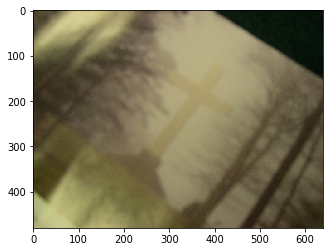

In [161]:
q_img = cv2.imread(queryimagepath)    
q_img = cv2.cvtColor(q_img, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create(100)
sift = cv2.ORB_create(100)
q_kp, q_des = sift.detectAndCompute(q_img, None)
plt.imshow(cv2.drawKeypoints(q_img, q_kp, q_img.copy()))

In [162]:
len(q_kp), len(q_des)

TypeError: object of type 'NoneType' has no len()

In [163]:
q_des.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [148]:
nfeatures = q_des.shape[1]
nfeatures

128

In [157]:
padding = numpy.zeros((2, nfeatures))
padding.shape

(2, 128)

In [156]:
q_kp = numpy.vstack((q_kp, padding))
temp = q_des.astype('float')  # convert descriptors to float
descriptors = temp[:]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 128

In [116]:
mydataSIFT.loc[877]

file                              ./ukbench/ukbench00925.jpg
siftdes    [[1.0, 4.0, 4.0, 3.0, 1.0, 1.0, 100.0, 37.0, 9...
Name: 877, dtype: object

In [118]:
d = mydataSIFT.loc[877]['siftdes']
print (d)
d.shape

[[  1.   4.   4.   3.   1.   1. 100.  37.   9.   7.   8.   6.   2.   1.
   87. 103.  67.  24.   6.   1.   0.   0.  18. 124.  41.   1.   0.   0.
    2.   2.   2.  33.  66.  27.   5.   3.  19.   5.  56.  41.  19.  47.
   62. 123. 124.  25.  39.  28. 124. 124.  51.  23.   8.   4.   5.  41.
   56.   7.   0.   0.   3.   4.   2.  14. 103.   7.   1.   1.  18.  13.
    5.  76.  20.   6.   4.  21. 124. 124.  94.  43. 124.  53.   7.   5.
   11.  31.  67. 124.  73.  32.   1.   0.   4.   4.   1.  11.  23.   0.
    0.   0.   0.   1.   2.  35.  12.   0.   0.   0.   9.  34.  33.   9.
   26.  20.   4.   2.  15.  26.  42.  38.  64.  20.   1.   0.   3.   0.
    2.  25.]]


(1, 128)

In [54]:
mydataSIFT.describe

<bound method NDFrame.describe of                              file  \
0      ./ukbench/ukbench09127.jpg   
1      ./ukbench/ukbench02277.jpg   
2      ./ukbench/ukbench03743.jpg   
3      ./ukbench/ukbench02284.jpg   
4      ./ukbench/ukbench01769.jpg   
5      ./ukbench/ukbench09239.jpg   
6      ./ukbench/ukbench00758.jpg   
7      ./ukbench/ukbench08166.jpg   
8      ./ukbench/ukbench01513.jpg   
9      ./ukbench/ukbench03230.jpg   
10     ./ukbench/ukbench03097.jpg   
11     ./ukbench/ukbench02099.jpg   
12     ./ukbench/ukbench01313.jpg   
13     ./ukbench/ukbench02378.jpg   
14     ./ukbench/ukbench08585.jpg   
15     ./ukbench/ukbench09790.jpg   
16     ./ukbench/ukbench01300.jpg   
17     ./ukbench/ukbench04733.jpg   
18     ./ukbench/ukbench00575.jpg   
19     ./ukbench/ukbench03842.jpg   
20     ./ukbench/ukbench09240.jpg   
21     ./ukbench/ukbench08462.jpg   
22     ./ukbench/ukbench09611.jpg   
23     ./ukbench/ukbench08732.jpg   
24     ./ukbench/ukbench05793.jpg   
25  

In [5]:
from imutils import paths
from PIL import Image
import time
import foregroundextraction as extract
import os 
import matplotlib.pyplot as plt

# to reload module: uncomment use the following 
# %load_ext autoreload
# %autoreload 2


# for hash all the images in folder / database 

IMGDIR = r"../data/imagesbooks/"
IMGDIRPROCESSED = ['']*5
IMGDIRPROCESSED[0] = r"../data/imagesbooks1/"
IMGDIRPROCESSED[1] = r"../data/imagesbooks2/"
IMGDIRPROCESSED[2] = r"../data/imagesbooks3/"
IMGDIRPROCESSED[3] = r"../data/imagesbooks4/"
IMGDIRPROCESSED[4] = r"../data/imagesbooks_warp/"


# check directories, create if not exist
for dir in IMGDIRPROCESSED : 
    if not os.path.exists(os.path.dirname(dir)):
        try:
            os.makedirs(os.path.dirname(dir))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise


In [9]:
haystackPaths = list(paths.list_images(IMGDIR)) #[:2]
# print(haystackPaths)

# test
image1, image2, image3, image4, bbmap = extract.foregroundExtractAndWarp(haystackPaths[1])    # check 

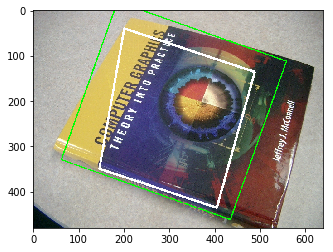

In [7]:
plt.imshow(bbmap)

In [10]:
# Run entire image set and create processed images

# time preprocessing operation 
start = time.time()
counter = 1 
for f in haystackPaths:
    
    image_orig = Image.open(f)
    # image1, image2 = extract.foregroundExtract(f)    # check 
    image1, image2, image3, image4, bbmap = extract.foregroundExtractAndWarp(f)    # check 

    img1 = Image.fromarray(image1)          # 0 filled bg                # check 
    img2 = Image.fromarray(image2)          # transparent bg             # check 
    img3 = Image.fromarray(image3)          # warped bounding box        # check 
    img4 = Image.fromarray(image4)          # warped inner bounding box  # check 
    img5 = Image.fromarray(bbmap)           # warped inner bounding box  # check 
    filename = os.path.basename(f).split('.')[0]
    img1.save( IMGDIRPROCESSED[0] + filename + '.png', format='PNG')
    img2.save( IMGDIRPROCESSED[1] + filename + '.png', format='PNG')
    img3.save( IMGDIRPROCESSED[2] + filename + '.png', format='PNG')
    img4.save( IMGDIRPROCESSED[3] + filename + '.png', format='PNG')
    img5.save( IMGDIRPROCESSED[4] + filename + '.png', format='PNG')
    print ("Processed " , counter , ' ', filename)
    counter += 1

print("[INFO] processed {} images in {:.2f} seconds".format(
len(haystackPaths), time.time() - start))

Processed  1   ukbench08011
Processed  2   ukbench05955
Processed  3   ukbench06110
Processed  4   ukbench05970
Processed  5   ukbench03060
Processed  6   ukbench10163
Processed  7   ukbench05878
Processed  8   ukbench06536
Processed  9   ukbench06001
Processed  10   ukbench05953
Processed  11   ukbench03037
Processed  12   ukbench05993
Processed  13   ukbench05980
Processed  14   ukbench09364
Processed  15   ukbench08603
Processed  16   ukbench08597
Processed  17   ukbench08010
Processed  18   ukbench05874
Processed  19   ukbench06410
Processed  20   ukbench05935
Processed  21   ukbench00458
Processed  22   ukbench06701
Processed  23   ukbench03890
Processed  24   ukbench05944
Processed  25   ukbench06700
Processed  26   ukbench05967
Processed  27   ukbench06040
Processed  28   ukbench09366
Processed  29   ukbench05991
Processed  30   ukbench05945
Processed  31   ukbench05941
Processed  32   ukbench06118
Processed  33   ukbench05985
Processed  34   ukbench08000
Processed  35   ukbench